In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import utils
from tensorflow.keras import layers, models, utils
from keras.utils import np_utils
from keras.backend import conv2d
import cv2
import numpy as np
from tensorflow.keras.optimizers import SGD
from tensorflow import keras
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.preprocessing import image
from matplotlib.colors import NoNorm
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
import seaborn as sns
from tensorflow.math import confusion_matrix


In [ ]:
from google.colab import files
files.upload()

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg


{'0.jpg': b'BMf\t\x00\x00\x00\x00\x00\x006\x00\x00\x00(\x00\x00\x00\x1c\x00\x00\x00\x1c\x00\x00\x00\x01\x00\x18\x00\x00\x00\x00\x000\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\x

In [ ]:
!ls

0.jpg  3.jpg  6.jpg  9.jpg	four.png     seven.png	two.png
1.jpg  4.jpg  7.jpg  eight.png	one.png      six.png
2.jpg  5.jpg  8.jpg  five.png	sample_data  three.png


In [ ]:
(x_train_old, y_train_old), (x_test_old, y_test_old) = mnist.load_data()

# Нормализация

In [ ]:
import keras.utils as image

def get_reshape_img(img):
  return np.array((255 - image.img_to_array(img).reshape(28,28))/ 255)
myImgMas=[]
reshapeMas=[]

for i in range(10):
  path = str(i)+".jpg"
  myImgMas.append(image.load_img(path, target_size=(28,28), color_mode = "grayscale"))
  reshapeMas.append(get_reshape_img(myImgMas[-1]))
reshapeMas = np.array(reshapeMas)


In [ ]:
x_train = x_train_old / np.max(x_train_old)
x_test = x_test_old / np.max(x_test_old)

y_train = np_utils.to_categorical(y_train_old)
y_test = np_utils.to_categorical(y_test_old)

In [ ]:
labels = [str(i) for i in range(10)]

def getImgPlot(x_data,y_data,model=False):
  plt.figure(figsize=(20,20))
  for i in range(len(x_data)):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_data[i], cmap=plt.get_cmap('gray'))
    plt.xlabel("Верный ответ:"+labels[y_data[i]] )

### MNIST

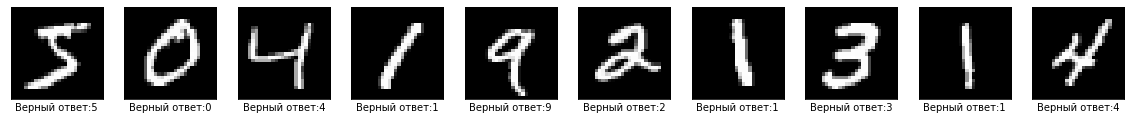

In [ ]:
getImgPlot(x_train_old[:10],y_train_old[:10])

### Созданные

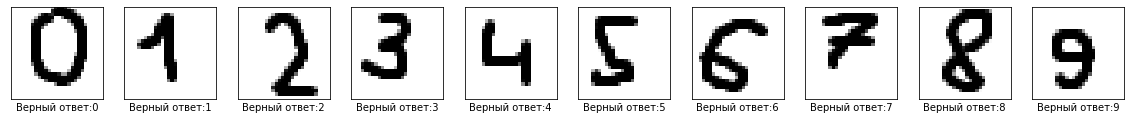

In [ ]:
getImgPlot(myImgMas,range(10))

# Многослойный персептрон

In [ ]:
modelMP=False
modelMP = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='sigmoid'),
])

In [ ]:
modelMP.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historyMP=modelMP.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=200)

Epoch 1/50
300/300 [==============================] - 4s 11ms/step - loss: 0.7549 - accuracy: 0.8120 - val_loss: 0.3036 - val_accuracy: 0.9184
Epoch 2/50
300/300 [==============================] - 3s 10ms/step - loss: 0.2658 - accuracy: 0.9231 - val_loss: 0.2234 - val_accuracy: 0.9333
Epoch 3/50
300/300 [==============================] - 3s 11ms/step - loss: 0.2030 - accuracy: 0.9405 - val_loss: 0.1799 - val_accuracy: 0.9465
Epoch 4/50
300/300 [==============================] - 4s 14ms/step - loss: 0.1635 - accuracy: 0.9518 - val_loss: 0.1528 - val_accuracy: 0.9541
Epoch 5/50
300/300 [==============================] - 3s 10ms/step - loss: 0.1347 - accuracy: 0.9604 - val_loss: 0.1345 - val_accuracy: 0.9594
Epoch 6/50
300/300 [==============================] - 3s 11ms/step - loss: 0.1115 - accuracy: 0.9671 - val_loss: 0.1179 - val_accuracy: 0.9629
Epoch 7/50
300/300 [==============================] - 3s 11ms/step - loss: 0.0935 - accuracy: 0.9721 - val_loss: 0.1008 - val_accuracy: 0.9693

# Сверточная сеть

In [ ]:
modelCNN=False
modelCNN = Sequential()
modelCNN.add(Conv2D(16, (5,5), padding='same', input_shape=(28,28,1)))
modelCNN.add(Activation('relu'))
modelCNN.add(Conv2D(32, (5,5)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.25))

modelCNN.add(Conv2D(32, (3,3), padding='same'))
modelCNN.add(Activation('relu'))
modelCNN.add(Conv2D(64, (3,3)))
modelCNN.add(Activation('relu'))
modelCNN.add(MaxPooling2D(pool_size=(2,2)))
modelCNN.add(Dropout(0.25))

modelCNN.add(Flatten())
modelCNN.add(Dense(128))
modelCNN.add(Activation('relu'))
modelCNN.add(Dropout(0.5))
modelCNN.add(Dense(10))
modelCNN.add(Activation('softmax'))

In [ ]:
modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historyCNN=modelCNN.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 201s 214ms/step - loss: 0.2365 - accuracy: 0.9261 - val_loss: 0.0383 - val_accuracy: 0.9868
Epoch 2/5
938/938 [==============================] - 199s 212ms/step - loss: 0.0796 - accuracy: 0.9765 - val_loss: 0.0293 - val_accuracy: 0.9905
Epoch 3/5
938/938 [==============================] - 205s 218ms/step - loss: 0.0600 - accuracy: 0.9827 - val_loss: 0.0307 - val_accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 203s 216ms/step - loss: 0.0509 - accuracy: 0.9858 - val_loss: 0.0285 - val_accuracy: 0.9903
Epoch 5/5
938/938 [==============================] - 209s 222ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0224 - val_accuracy: 0.9932


In [ ]:
import seaborn as sns
from tensorflow.math import confusion_matrix
labels = [str(i) for i in range(10)]

def getImgPlot(x_data,y_data,model,x_data_norm):
  plt.figure(figsize=(20,20))
  for i in range(len(x_data)):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_data[i], cmap=plt.get_cmap('gray'))
    plt.xlabel("Верный ответ:"+labels[y_data[i]] )
  plt.figure(figsize=(20,20))
  predict = model.predict(x_data_norm)
  for i in range(len(x_data)):
    plt.subplot(10,10,i+1)
    plt.yticks([])
    plt.bar([i for i in range(10)],predict[i])
  return predict

def errorPlot(history):
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
  ax1.plot(history.history['accuracy'], label='test')
  ax1.plot(history.history['val_accuracy'], label='train')
  ax1.set_title('model accuracy')
  ax1.set_xlabel('epoch')
  ax1.set_ylabel('accuracy')
  ax1.legend(loc='upper right')

  ax2.plot(history.history['loss'], label='test')
  ax2.plot(history.history['val_loss'], label='train')
  ax2.set_title('model loss')
  ax2.set_xlabel('epoch')
  ax2.set_ylabel('loss')
  ax2.legend(loc='upper right')

def errorMatrics(y_predict,y_value):
  confusion_mtx = confusion_matrix(y_predict, y_value)
  plt.figure(figsize=(12, 9))
  sns.heatmap(confusion_mtx, annot=True, fmt='g')
  plt.show()

## Визуализация персептрона

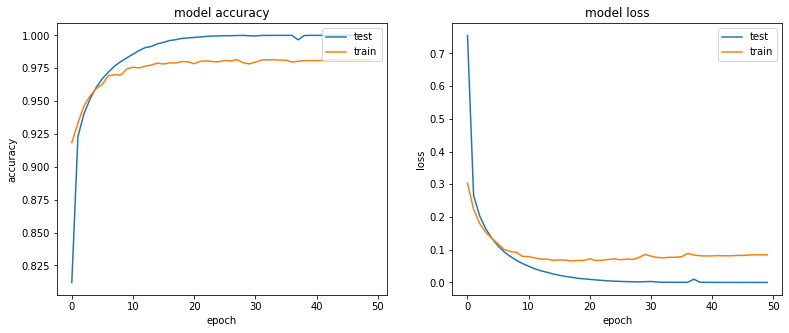

In [ ]:
errorPlot(historyMP)

1/1 [==============================] - 0s 26ms/step


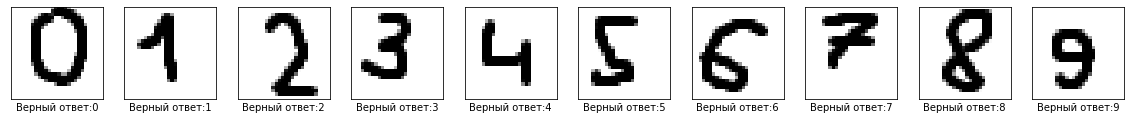

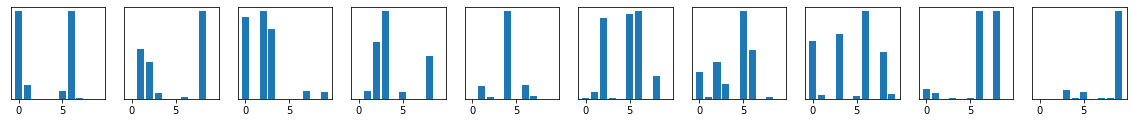

In [ ]:
predict = getImgPlot(myImgMas,range(10),modelMP,reshapeMas)

313/313 [==============================] - 1s 4ms/step


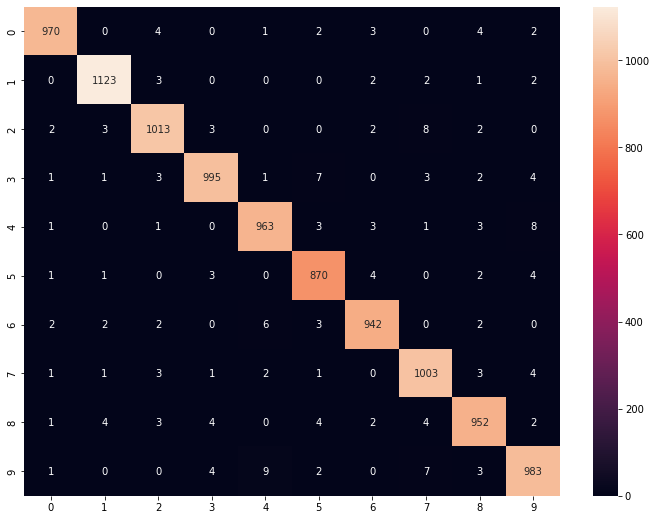

In [ ]:
errorMatrics(np.argmax(modelMP.predict(x_test), axis=1),y_test_old)

## Визуализация свертночной сети

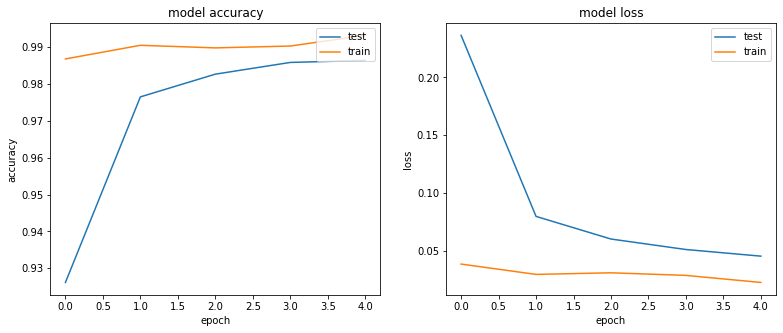

In [ ]:
errorPlot(historyCNN)

1/1 [==============================] - 0s 30ms/step


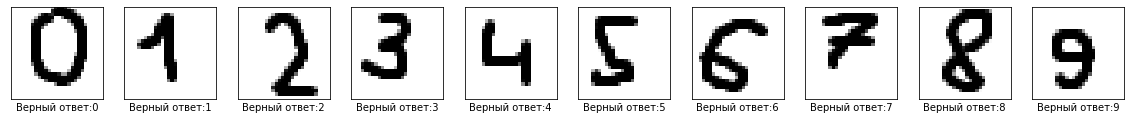

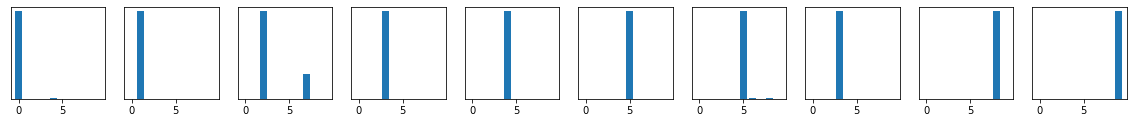

In [ ]:
predict = getImgPlot(myImgMas,range(10),modelCNN,reshapeMas)

313/313 [==============================] - 9s 27ms/step


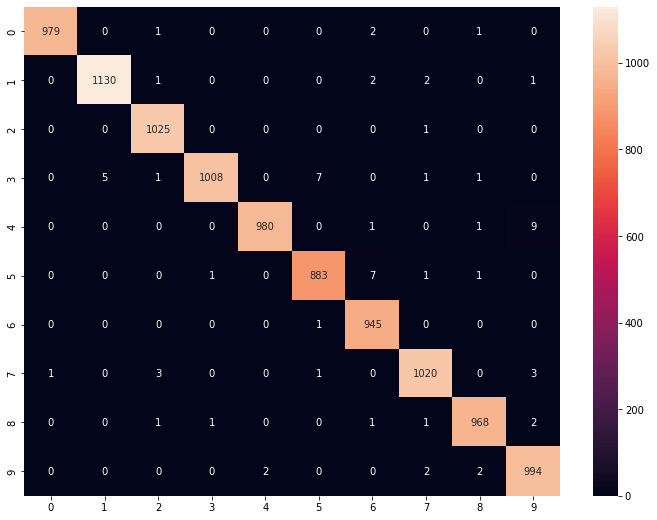

In [ ]:
errorMatrics(np.argmax(modelCNN.predict(x_test), axis=1),y_test_old)